<a href="https://colab.research.google.com/github/sumitchhipa/python-learning/blob/main/outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/newplacementdata.csv")
df

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [4]:
# outliers-> these are the data points who flacuate the mean of our data.]
# for check -> we will use boxplot
# in boxplot we have some identification parameters
# 1 lower fence
# 2 25% of data
# 3 50% --
# 4 75%--
# 5 upper fence
# if any point is lower fence it will consider as outlier
# if any point is upperfence it will consider as outlier
# ex. a= 1,2,3,4,5
# mesn= (1,2,3,4,5)/5=3
#  a= 1,2,3,4,5
# mesn= (1,2,3,4,5,100)/5=3
# so here100 is outliers
# how to handle outlier
# 1 trimmig
#  a= 1,2,3,4,5
# let suppose here 1 is outlier so [2-5]
# 2 capping
# -2,-1,0,1,2,3,4,100,200
# min fence=0 max fence=4
# range expand -min - max


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


<Axes: xlabel='placement_exam_marks'>

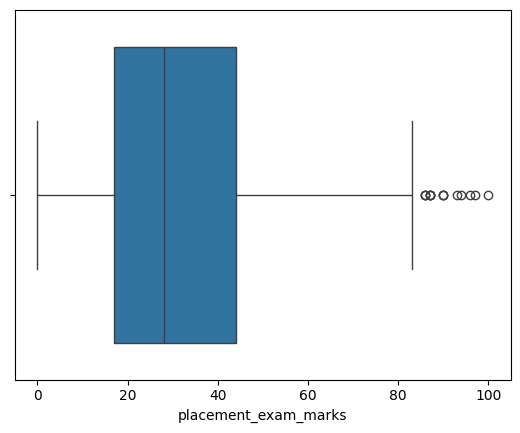

In [7]:
sns.boxplot(x=df['placement_exam_marks'])

In [8]:
# finding the IQR
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)


In [9]:
percentile25

np.float64(17.0)

In [17]:
percentile75

np.float64(44.0)

In [18]:
iqr=percentile75-percentile25
iqr



np.float64(27.0)

In [19]:
upperlimit=percentile75+1.5*iqr
upperlimit

np.float64(84.5)

In [20]:
lowerlimit=percentile25-1.5*iqr
lowerlimit

np.float64(-23.5)

In [21]:
df[df['placement_exam_marks']>upperlimit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [22]:
df[df['placement_exam_marks']<lowerlimit]

,cgpa,placement_exam_marks,placed


In [24]:
# trimmimg--->4 (lower).....1 , upper(25)....(50) here, 50 are

In [25]:
newdf=df[df['placement_exam_marks']< upperlimit]

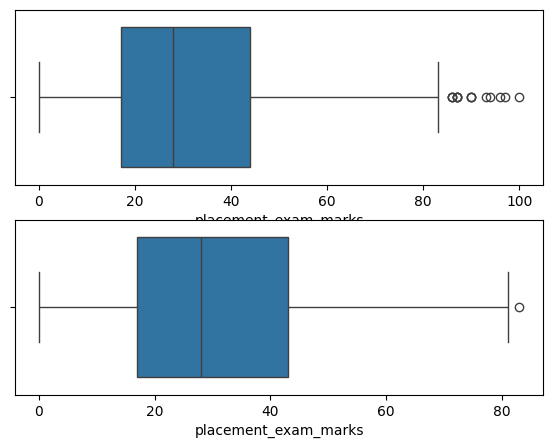

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])
plt.subplot(2,2,4)
sns.boxplot(x=newdf['placement_exam_marks'])
plt.show()

In [27]:
# xppimg
newdf_cap=df.copy()

In [30]:
newdf_cap['placement_exam_marks']=np.where(
    newdf_cap['placement_exam_marks']>upperlimit,upperlimit,
    np.where(newdf_cap['placement_exam_marks']<lowerlimit,lowerlimit,
             newdf_cap['placement_exam_marks'])
    )

In [31]:
newdf_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [32]:
newdf_cap.shape

(1000, 3)

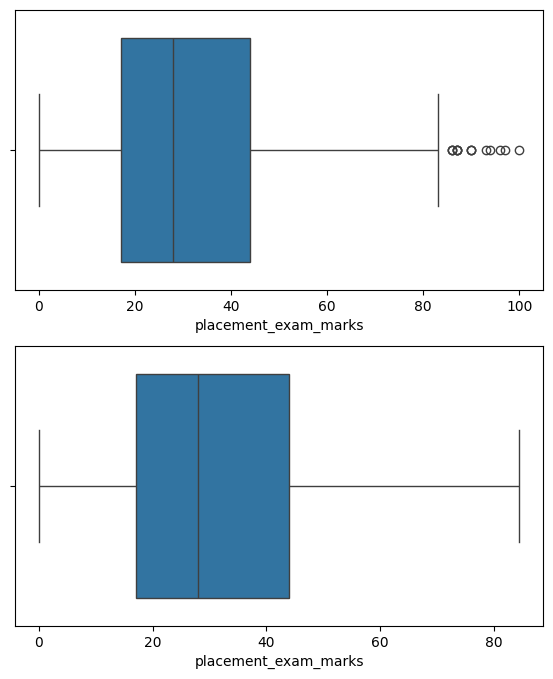

In [34]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,2)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(x=newdf_cap['placement_exam_marks'])
plt.show()